In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from itertools import product

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '../sympde/viz'))

from model.networks.linear import CalculatedP, LinearP
from general_plots import imshows, plot_vals, simple_imshow

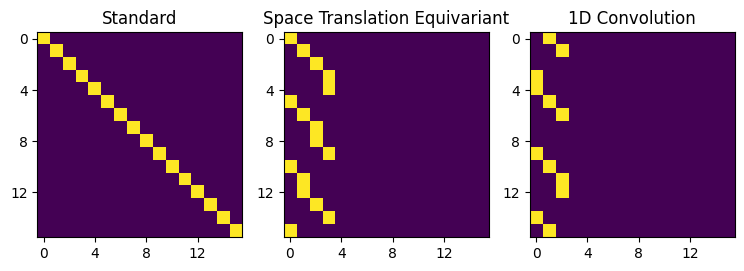

In [2]:
size_plot = 4
transform_funcs = {k: v() for k, v in CalculatedP(size = size_plot).transform_funcs.items()}

Ps = ['none', 'space_translation', 'kernelconv']
title = {
    'none': 'Standard',
    'space_translation': 'Space Translation Equivariant',
    'kernelconv': '1D Convolution'
}

fig, axs = plt.subplots(1, len(Ps), figsize = (len(Ps)*3, 3))

for i, P in enumerate(Ps):
    ax = axs[i]
    ax.imshow(transform_funcs[P])
    ax.set_title(title[P])
    ticks = [i * size_plot for i in range(size_plot)]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
plt.show()

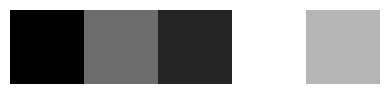

In [3]:
x = torch.tensor([[0.1, 0.4, 0.2, 0.8, 0.6]])
size = x.shape[-1]
imshows([x], axis_off = True, imshow_kwargs={'cmap': 'gray'}, rows = False)

In [4]:
kernel_size = 3
conv = nn.Conv1d(
    in_channels  = 1, 
    out_channels = 1,
    kernel_size  = kernel_size,
    padding = 1,
    bias = False,
    padding_mode = 'circular',
)
out_conv = conv(x.unsqueeze(0)).squeeze(0)
out_conv


tensor([[-0.3505, -0.2367, -0.2468, -0.4533, -0.7441]],
       grad_fn=<SqueezeBackward1>)

In [5]:
# Initializing the custom linear layer with the mapping P for a convolutional kernel 
linear = LinearP(in_features = size, out_features = size, bias = False, P_init = 'kernelconv')

# Setting the weights of the linear layer to be the same as the convolutional kernel
linear.weight.data.flatten()[:kernel_size] = conv.weight.squeeze()

assert torch.allclose(linear(x, normalize_P=False), out_conv)